In [156]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
import pandas as pd
import datetime as dt
import re

In [158]:
filepath = '/media/sf_VBox_Shared/London/example_data'
filename = filepath + '/part2_windowsummary.csv'
data = pd.read_csv(filename, index_col=['time'], parse_dates=True)
data = data[~data["id"].isnull()]

In [159]:
# Extract serial number and day
featurenames = data.columns[4:]
data['day'] = [str(d) for d in data.index.date]
data['serial number'] = [int(s) for s in data['serial number']]
data.head()

,id,serial number,filename,Nhoursvalid,mean metric ENMO,sd metric ENMO,p5 metric ENMO,p25 metric ENMO,p50 metric ENMO,p75 metric ENMO,p95 metric ENMO,mean metric anglez,sd metric anglez,p5 metric anglez,p25 metric anglez,p50 metric anglez,p75 metric anglez,p95 metric anglez,day
time,,,,,,,,,,,,,,,,,,,
2014-08-01 04:00:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015216,0.000530,0.014479,0.014857,0.015209,0.015546,0.016095,-39.317284,0.048373,-39.378809,-39.352864,-39.316961,-39.281406,-39.240260,2014-08-01
2014-08-01 04:10:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015160,0.000522,0.014232,0.014874,0.015133,0.015534,0.015891,-39.349687,0.065171,-39.452094,-39.391423,-39.336663,-39.307390,-39.264456,2014-08-01
2014-08-01 04:20:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015181,0.004180,0.010862,0.014729,0.015099,0.015506,0.016189,-37.359455,7.890470,-39.431267,-39.364191,-39.337401,-39.299842,-26.144194,2014-08-01
2014-08-01 04:30:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015197,0.008969,0.011073,0.011628,0.012248,0.012886,0.025105,-36.171533,5.857137,-48.853285,-34.069524,-33.879162,-32.846824,-32.753698,2014-08-01
2014-08-01 04:40:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015590,0.020108,0.000000,0.000000,0.000000,0.025809,0.040461,5.806129,54.439121,-59.597338,-46.786000,55.306174,55.474992,60.089516,2014-08-01


In [160]:
#Create dataest by day, serialnumber
grouped = data.groupby(['serial number', 'day'])

We look at: 016563_2014-08-08
Seems to be unavailable so take 2014-08-01

In [161]:
serialnumber = 16563
day = '2014-08-01'

In [162]:
data_bobby = grouped.get_group((serialnumber, day))
data_bobby.head()

,id,serial number,filename,Nhoursvalid,mean metric ENMO,sd metric ENMO,p5 metric ENMO,p25 metric ENMO,p50 metric ENMO,p75 metric ENMO,p95 metric ENMO,mean metric anglez,sd metric anglez,p5 metric anglez,p25 metric anglez,p50 metric anglez,p75 metric anglez,p95 metric anglez,day
time,,,,,,,,,,,,,,,,,,,
2014-08-01 04:00:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015216,0.000530,0.014479,0.014857,0.015209,0.015546,0.016095,-39.317284,0.048373,-39.378809,-39.352864,-39.316961,-39.281406,-39.240260,2014-08-01
2014-08-01 04:10:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015160,0.000522,0.014232,0.014874,0.015133,0.015534,0.015891,-39.349687,0.065171,-39.452094,-39.391423,-39.336663,-39.307390,-39.264456,2014-08-01
2014-08-01 04:20:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015181,0.004180,0.010862,0.014729,0.015099,0.015506,0.016189,-37.359455,7.890470,-39.431267,-39.364191,-39.337401,-39.299842,-26.144194,2014-08-01
2014-08-01 04:30:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015197,0.008969,0.011073,0.011628,0.012248,0.012886,0.025105,-36.171533,5.857137,-48.853285,-34.069524,-33.879162,-32.846824,-32.753698,2014-08-01
2014-08-01 04:40:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015590,0.020108,0.000000,0.000000,0.000000,0.025809,0.040461,5.806129,54.439121,-59.597338,-46.786000,55.306174,55.474992,60.089516,2014-08-01


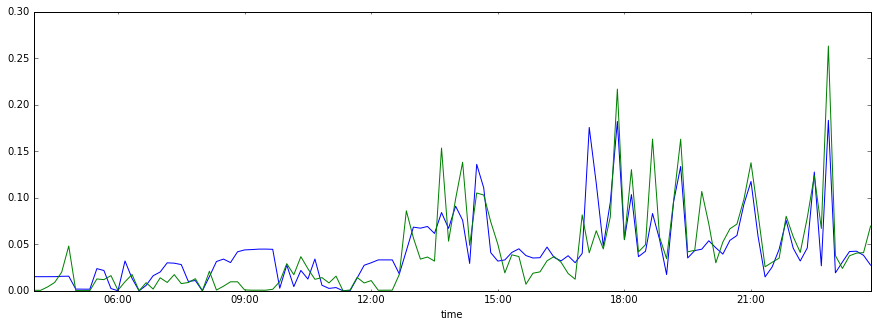

In [163]:
plt.subplots(figsize=(15,5))
data_bobby["mean metric ENMO"].plot()
data_bobby["sd metric ENMO"].plot();

## Merge with annotations

In [164]:
annotations = pd.read_csv('/media/sf_VBox_Shared/London/data_annotations.csv')

In [165]:
# Extract day in same format
annotations['day'] = [str(datetime.datetime.strptime(d.strip(), '%d/%m/%Y').date()) for d in annotations['ddate1']]
annotations.head()

,ddate1,tudday,tudm,stime,etime,activity,actp,Monitor,ddate1num,distance,filename,day
0,01/08/2014,1,App,04:00:00,12:00:00,Sleepingandresting(includingsickinbed),Sleepingandresting(includingsickinbed),16563,1406844000,18000,__016563_2014-08-08 12-02-19.bin_day1.RData,2014-08-01
1,01/08/2014,1,App,12:00:00,19:00:00,"WatchTV,DVDs,downloadedvideos","WatchingTV,DVDs,downloadedvideos",16563,1406844000,18000,__016563_2014-08-08 12-02-19.bin_day1.RData,2014-08-01
2,01/08/2014,1,App,19:00:00,00:00:00,"Speaking,socialisingface-to-face","Speaking,socialisingface-to-face",16563,1406844000,18000,__016563_2014-08-08 12-02-19.bin_day1.RData,2014-08-01
3,01/08/2014,1,App,00:00:00,04:00:00,"WatchTV,DVDs,downloadedvideos","WatchingTV,DVDs,downloadedvideos",16563,1406844000,18000,__016563_2014-08-08 12-02-19.bin_day1.RData,2014-08-01
4,03/08/2014,2,App,04:00:00,06:00:00,"WatchTV,DVDs,downloadedvideos","WatchingTV,DVDs,downloadedvideos",16563,1407016800,154800,__016563_2014-08-08 12-02-19.bin_day2.RData,2014-08-03


In [166]:
def getDatetime(datestr):
    hour = re.search(' \d+', datestr).group()
    if int(hour) > 23:
        repl = ' '+str(int(hour)-24)
        datestr = re.sub(hour, repl, datestr)
    time = datetime.datetime.strptime(datestr, '%d/%m/%Y %H:%M:%S')
    return time
    

annotations['start_datetime'] = pd.Series()
annotations['end_datetime'] = pd.Series()
for i in range(annotations.shape[0]):
    row = annotations.iloc[i]
    rStartStr = row['ddate1'].strip() + ' ' + row['stime'].strip()
    
    rStart = getDatetime(rStartStr)

    rEndStr = row['ddate1'].strip() + ' ' + row['etime'].strip()
    rEnd = getDatetime(rEndStr)
    if rEnd <= rStart:
        rEnd += datetime.timedelta(days=1)
        
    annotations.set_value(i, 'start_datetime', rStart)
    annotations.set_value(i, 'end_datetime', rEnd)
    #(serialnumber, day)
    ind = (data["serial number"] == row['Monitor'])  &  \
          (data["day"] == row['day']) & \
          (data.index < rEnd) & (data.index > rStart)
    data.loc[ind, 'activity'] = row['activity']

In [167]:
data.head()

,id,serial number,filename,Nhoursvalid,mean metric ENMO,sd metric ENMO,p5 metric ENMO,p25 metric ENMO,p50 metric ENMO,p75 metric ENMO,p95 metric ENMO,mean metric anglez,sd metric anglez,p5 metric anglez,p25 metric anglez,p50 metric anglez,p75 metric anglez,p95 metric anglez,day,activity
time,,,,,,,,,,,,,,,,,,,,
2014-08-01 04:00:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015216,0.000530,0.014479,0.014857,0.015209,0.015546,0.016095,-39.317284,0.048373,-39.378809,-39.352864,-39.316961,-39.281406,-39.240260,2014-08-01,NaN
2014-08-01 04:10:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015160,0.000522,0.014232,0.014874,0.015133,0.015534,0.015891,-39.349687,0.065171,-39.452094,-39.391423,-39.336663,-39.307390,-39.264456,2014-08-01,Sleepingandresting(includingsickinbed)
2014-08-01 04:20:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015181,0.004180,0.010862,0.014729,0.015099,0.015506,0.016189,-37.359455,7.890470,-39.431267,-39.364191,-39.337401,-39.299842,-26.144194,2014-08-01,Sleepingandresting(includingsickinbed)
2014-08-01 04:30:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015197,0.008969,0.011073,0.011628,0.012248,0.012886,0.025105,-36.171533,5.857137,-48.853285,-34.069524,-33.879162,-32.846824,-32.753698,2014-08-01,Sleepingandresting(includingsickinbed)
2014-08-01 04:40:00,not stored in header,16563,__016563_2014-08-08 12-02-19.bin,0.166667,0.015590,0.020108,0.000000,0.000000,0.000000,0.025809,0.040461,5.806129,54.439121,-59.597338,-46.786000,55.306174,55.474992,60.089516,2014-08-01,Sleepingandresting(includingsickinbed)


In [168]:
#For a 'simple' datasets, which categories do we choose? There should be enough data.

data.groupby('activity').count()['id'].sort_values(ascending=False)
#annotations.groupby('activity').count()['Monitor'].sort_values(ascending=False)

activity
Sleepingandresting(includingsickinbed)                                         707
WatchTV,DVDs,downloadedvideos                                                  437
PlayingelectronicgamesandApps                                                  205
Reading(notforschool)                                                          177
Didnothing,justrelaxing,bored,waiting                                          166
Speaking,socialisingface-to-face                                               136
Generalinternetbrowsing,programming(nottimeonsocialnetworkingsites)            116
Otheractivitiesnotlisted                                                       106
Personalcare(includingtakingashower/bath,grooming,gettingdressedetc.)           85
Travelbycar,van(includingvehiclesownedbyfriendsandfamily)                       59
Answeringemails,instantmessaging,texting                                        49
Listeningtomusic,radio,iPod,otheraudiocontent                                 

## Create toy data set

In [182]:
categories_c0 = ['Sleepingandresting(includingsickinbed)']
categories_c1 = ['WatchTV,DVDs,downloadedvideos', 'PlayingelectronicgamesandApps']
data['class'] = None
data['class'] = [0 if a in categories_c0 else 1 if a in categories_c1 else None for a in data['activity']]

toyset = data[data['class'].notnull()]
toyset = toyset[['class'] + list(featurenames)]
toyset.to_csv(filepath+'toydata.csv', index=False)

ntotal = toyset.shape[0]
ntrain = int(ntotal*0.8)
nval = int(ntotal*0.1)
ntest = ntotal - ntrain - nval

toyset_train = toyset[:ntrain]
toyset_val = toyset[ntrain:ntrain+nval]
toyset_test = toyset[ntrain+nval:]
print(toyset_train.shape, toyset_val.shape, toyset_test.shape)

toyset_train.to_csv(filepath+'toydata_train.csv', index=False)
toyset_val.to_csv(filepath+'toydata_val.csv', index=False)
toyset_test.to_csv(filepath+'toydata_test.csv', index=False)

toyset_X = np.array(toyset[featurenames])
toyset_y = np.array(toyset['class'], dtype='int')

print(toyset_X.shape, toyset_y.shape)

(1079, 15) (134, 15) (136, 15)
(1349, 14) (1349,)


## Look at one example

In [107]:
data_bobby = grouped.get_group((serialnumber, day))
data_bobby.head

,ddate1,tudday,tudm,stime,etime,activity,actp,Monitor,ddate1num,distance,filename,day,start_datetime,end_datetime
0,01/08/2014,1,App,04:00:00,12:00:00,Sleepingandresting(includingsickinbed),Sleepingandresting(includingsickinbed),16563,1406844000,18000,__016563_2014-08-08 12-02-19.bin_day1.RData,2014-08-01,2014-08-01 04:00:00,2014-08-01 12:00:00
1,01/08/2014,1,App,12:00:00,19:00:00,"WatchTV,DVDs,downloadedvideos","WatchingTV,DVDs,downloadedvideos",16563,1406844000,18000,__016563_2014-08-08 12-02-19.bin_day1.RData,2014-08-01,2014-08-01 12:00:00,2014-08-01 19:00:00
2,01/08/2014,1,App,19:00:00,00:00:00,"Speaking,socialisingface-to-face","Speaking,socialisingface-to-face",16563,1406844000,18000,__016563_2014-08-08 12-02-19.bin_day1.RData,2014-08-01,2014-08-01 19:00:00,2014-08-02 00:00:00
3,01/08/2014,1,App,00:00:00,04:00:00,"WatchTV,DVDs,downloadedvideos","WatchingTV,DVDs,downloadedvideos",16563,1406844000,18000,__016563_2014-08-08 12-02-19.bin_day1.RData,2014-08-01,2014-08-01 00:00:00,2014-08-01 04:00:00
4,03/08/2014,2,App,04:00:00,06:00:00,"WatchTV,DVDs,downloadedvideos","WatchingTV,DVDs,downloadedvideos",16563,1407016800,154800,__016563_2014-08-08 12-02-19.bin_day2.RData,2014-08-03,2014-08-03 04:00:00,2014-08-03 06:00:00
